In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv("Mortality_Data.csv")
df

,Month,Year,Disease Deaths,Wounds Deaths,Other Causes Deaths
0,April,1854,100,0,100
1,May,1854,160,0,90
2,June,1854,90,0,10
3,July,1854,1600,0,200
4,August,1854,2100,0,210
5,September,1854,2000,250,250
6,October,1854,1700,350,350
7,November,1854,2000,600,230
8,December,1854,4500,250,250
9,January,1855,5200,220,600


In [ ]:
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
month_year = []
for i in range(len(df)):
    month_year.append(str(df.loc[i, 'Month']) + ' ' + str(df.loc[i, 'Year']))

df['Month_Year'] = month_year

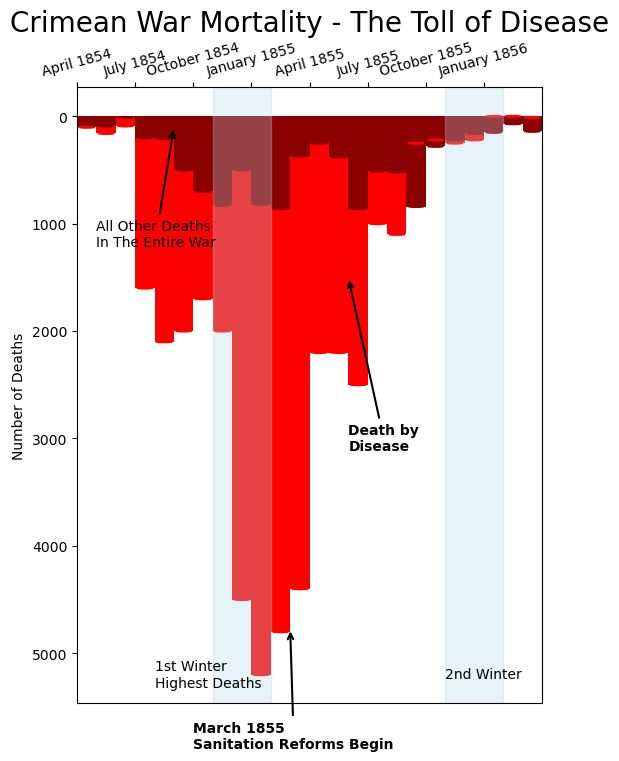

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Plot the bars with the updated color scheme
bars1 = ax.bar(df["Month_Year"], df["Disease Deaths"], color="red", label="Disease Deaths", align="edge", width=1)
bars2 = ax.bar(df["Month_Year"], df["Wounds Deaths"] + df["Other Causes Deaths"], color="darkred", label="All Other Deaths", align="edge", width=1)

# Add rounded edges to the bars


for bar in bars2:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center position
    circle = patches.Ellipse((x, height), width=0.8, height=15, color="darkred", clip_on=False)
    ax.add_patch(circle)

for bar in bars1:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center position
    circle = patches.Ellipse((x, height), width=0.8, height=15, color="red", clip_on=False)
    ax.add_patch(circle)

# Annotate Sanitary Reforms Start (March 1855) directly on the bar
reform_index = df[df["Month_Year"] == "March 1855"].index[0]
reform_deaths = df.loc[reform_index, "Disease Deaths"] + df.loc[reform_index, "Wounds Deaths"] + df.loc[reform_index, "Other Causes Deaths"]

# Add a label with a line pointing to the bar
ax.annotate(
    "March 1855\nSanitation Reforms Begin",
    xy=(reform_index, reform_deaths), xycoords="data",
    xytext=(reform_index - 5, reform_deaths + 1000), textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, ha="left", va="center", fontweight="bold"
)

ax.annotate(
    "Death by\nDisease",
    xy=(14, 1500), xycoords="data",
    xytext=(14, 3000), textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, ha="left", va="center", fontweight="bold"
)

ax.annotate(
    "All Other Deaths\nIn The Entire War", 
    xy=(5,  100), xycoords="data",
    xytext=(1, 100 + 1000), textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, ha="left", va="center"
)

ax.annotate(
    "1st Winter\nHighest Deaths",
    xy=(4, 5200), xycoords="data",
    xytext=(4, 5200), textcoords="data",
    fontsize=10, ha="left", va="center"
)

ax.annotate(
    "2nd Winter",
    xy=(19, 5200), xycoords="data",
    xytext=(19, 5200), textcoords="data",
    fontsize=10, ha="left", va="center"
)


# Shade the winter months (Nov 1854 - Feb 1855 and Nov 1855 - Feb 1856)
winter_start = df[df["Month_Year"] == "November 1854"].index[0]
winter_end = df[df["Month_Year"] == "February 1855"].index[0]
ax.axvspan(winter_start, winter_end, color="lightblue", alpha=0.3, label="Crimean Winter")

winter_start = df[df["Month_Year"] == "November 1855"].index[0]
winter_end = df[df["Month_Year"] == "February 1856"].index[0]
ax.axvspan(winter_start, winter_end, color="lightblue", alpha=0.3)

# Formatting X-Axis
plt.xticks(range(0, len(df["Month_Year"]), 3), df["Month_Year"][::3], rotation=15)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Formatting
plt.title("Crimean War Mortality - The Toll of Disease", fontsize=20)
plt.ylabel("Number of Deaths")
plt.gca().invert_yaxis()
plt.margins(x=0)
#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()
